In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
movieDataWithNA = pd.read_csv('top-500-movies.csv')
movieDataWithNA.head()

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,percentage_domestic,percentage_worldwide
0,1,23/4/2019,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,214.59,699.45
1,2,20/5/2011,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0,63.61,275.91
2,3,22/4/2015,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0,125.76,382.28
3,4,16/12/2015,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,306.10,674.71
4,5,25/4/2018,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,226.27,682.79


In [3]:
movieData = movieDataWithNA.dropna()
# to remove rows that contain NULL values

In [4]:
production_cost = pd.DataFrame(movieData['production_cost'])
worldwide_gross = pd.DataFrame(movieData['worldwide_gross'])
percentage_worldwide = pd.DataFrame(movieData['percentage_worldwide'])
release_date = pd.DataFrame(movieData['release_date'])

runtime = pd.DataFrame(movieData['runtime'])


In [5]:
time = release_date['release_date']
release_date['release_date'] = time

### Data Representation of Main Fields


<AxesSubplot:>

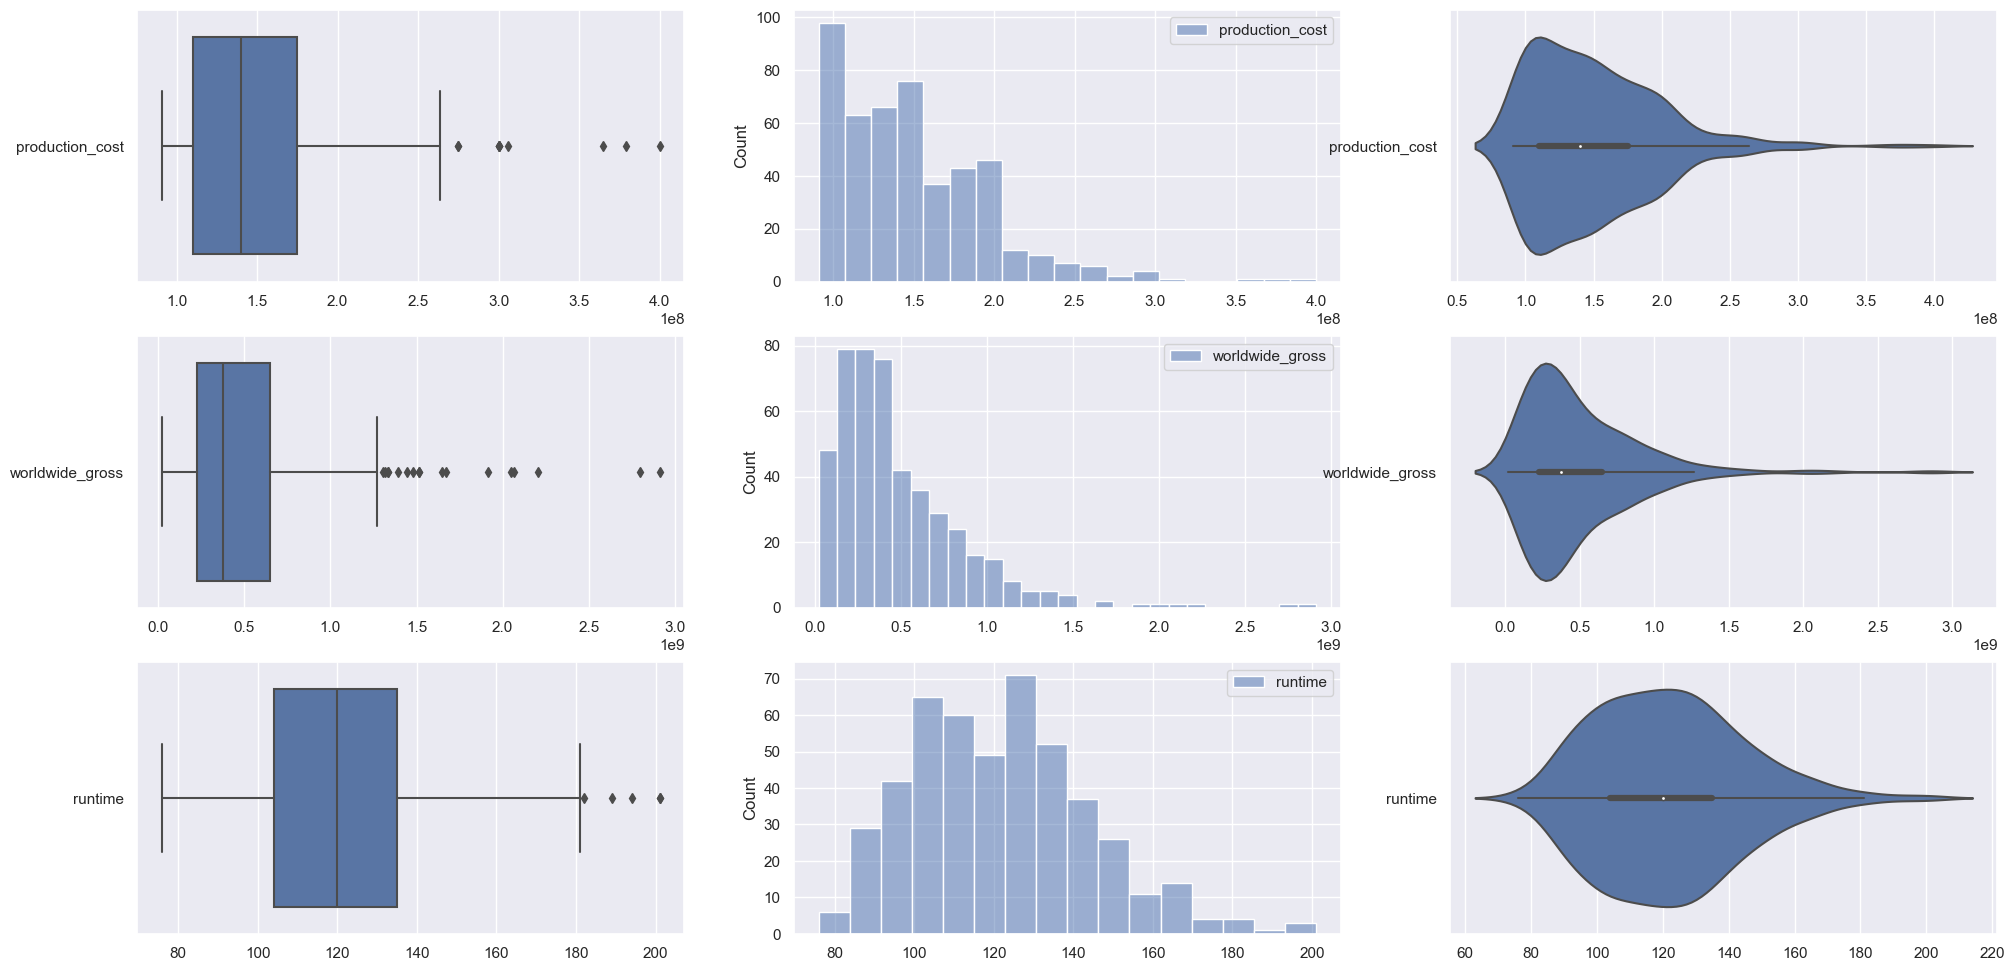

In [6]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for production_cost
sb.boxplot(data = production_cost, orient = "h", ax = axes[0,0])
sb.histplot(data = production_cost, ax = axes[0,1])
sb.violinplot(data = production_cost, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for percentage_worldwide
sb.boxplot(data = worldwide_gross, orient = "h", ax = axes[1,0])
sb.histplot(data = worldwide_gross, ax = axes[1,1])
sb.violinplot(data = worldwide_gross, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for percentage_domestic
sb.boxplot(data = runtime, orient = "h", ax = axes[2,0])
sb.histplot(data = runtime, ax = axes[2,1])
sb.violinplot(data = runtime, orient = "h", ax = axes[2,2])

# Removing outliers

### Numerical

In [7]:
movieNumData = pd.DataFrame(movieData[['production_cost', 'worldwide_gross']])
movieNumData.head(10)


,production_cost,worldwide_gross
0,400000000,2797800564
1,379000000,1045713802
2,365000000,1395316979
3,306000000,2064615817
4,300000000,2048359754
5,300000000,960996492
6,300000000,655945209
7,300000000,879500760
9,275000000,1072848487
10,275000000,393151347


In [8]:
runToGross = pd.DataFrame(movieData[['percentage_worldwide', 'runtime']])


production_cost    10
worldwide_gross    17
dtype: int64

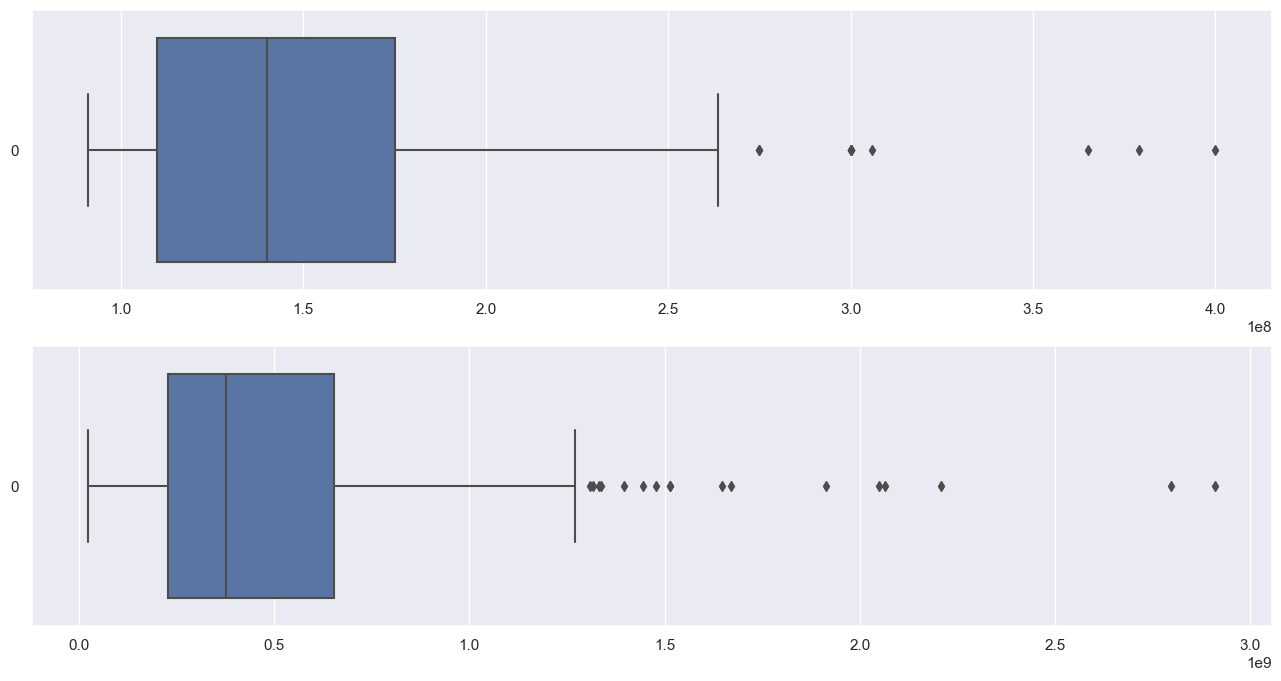

In [9]:
# Draw the boxplots
f, axes = plt.subplots(2, 1, figsize=(16, 8))

sb.boxplot(data = movieNumData["production_cost"], orient = "h", ax = axes[0])
sb.boxplot(data = movieNumData["worldwide_gross"], orient = "h", ax = axes[1])

# Calculate the quartiles
Q1 = movieNumData.quantile(0.25)
Q3 = movieNumData.quantile(0.75)

# Rule to identify outliers
rule = ((movieNumData < (Q1 - 1.5 * (Q3 - Q1))) | (movieNumData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

In [10]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0       True
1       True
2       True
3       True
4       True
       ...  
493    False
494    False
495    False
496    False
498    False
Length: 474, dtype: bool

In [11]:
# How many points are outliers for the two variables combined?
outliers.value_counts()

False    451
True      23
dtype: int64

In [12]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  13,  14,  24,
             29,  37,  46,  47,  48,  89, 141, 142, 189, 303],
           dtype='int64')

In [13]:
# Remove the outliers based on the row indices obtained above
movieNumData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
movieNumData

,production_cost,worldwide_gross
11,263700000,282778100
12,263000000,872395091
15,260000000,583777242
16,258000000,894860230
17,250000000,1151918521
...,...,...
493,92500000,162839667
494,92000000,631441092
495,92000000,304249198
496,92000000,23911362


In [14]:
movieNumData.describe()


,production_cost,worldwide_gross
count,4.510000e+02,4.510000e+02
mean,1.444594e+08,4.356147e+08
std,3.972095e+07,2.818825e+08
min,9.100000e+07,2.391136e+07
25%,1.100000e+08,2.191052e+08
50%,1.390000e+08,3.654918e+08
75%,1.750000e+08,6.105194e+08
max,2.637000e+08,1.270042e+09


### runtime

In [15]:
# Calculate the quartiles
Q1 = runToGross.quantile(0.25)
Q3 = runToGross.quantile(0.75)

# Rule to identify outliers
rule = ((runToGross < (Q1 - 1.5 * (Q3 - Q1))) | (runToGross > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

percentage_worldwide    14
runtime                  5
dtype: int64

In [16]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
493    False
494    False
495    False
496    False
498    False
Length: 474, dtype: bool

In [17]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([20, 24, 43, 46, 48, 141, 187, 189, 191, 303, 352, 414, 474, 485,
            486, 487, 490],
           dtype='int64')

In [18]:
# Remove the outliers based on the row indices obtained above
runToGross.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
runToGross

,percentage_worldwide,runtime
0,699.45,181.0
1,275.91,136.0
2,382.28,141.0
3,674.71,136.0
4,682.79,156.0
...,...,...
493,176.04,96.0
494,686.35,115.0
495,330.71,98.0
496,25.99,137.0


### update numerical values

In [19]:
production_cost = pd.DataFrame(movieNumData['production_cost'])
worldwide_gross = pd.DataFrame(movieNumData['worldwide_gross'])

runtime = pd.DataFrame(runToGross[['runtime']])
percentageForRun = pd.DataFrame(runToGross[[ 'percentage_worldwide']])

### Categorical

In [20]:
movieCatData = pd.DataFrame(movieData[['percentage_worldwide', 'genre', 'mpaa']])
movieCatData.head(10)


,percentage_worldwide,genre,mpaa
0,699.45,Action,PG-13
1,275.91,Adventure,PG-13
2,382.28,Action,PG-13
3,674.71,Adventure,PG-13
4,682.79,Action,PG-13
5,320.33,Adventure,PG-13
6,218.65,Action,PG-13
7,293.17,Action,PG-13
9,390.13,Adventure,PG-13
10,142.96,Adventure,PG-13


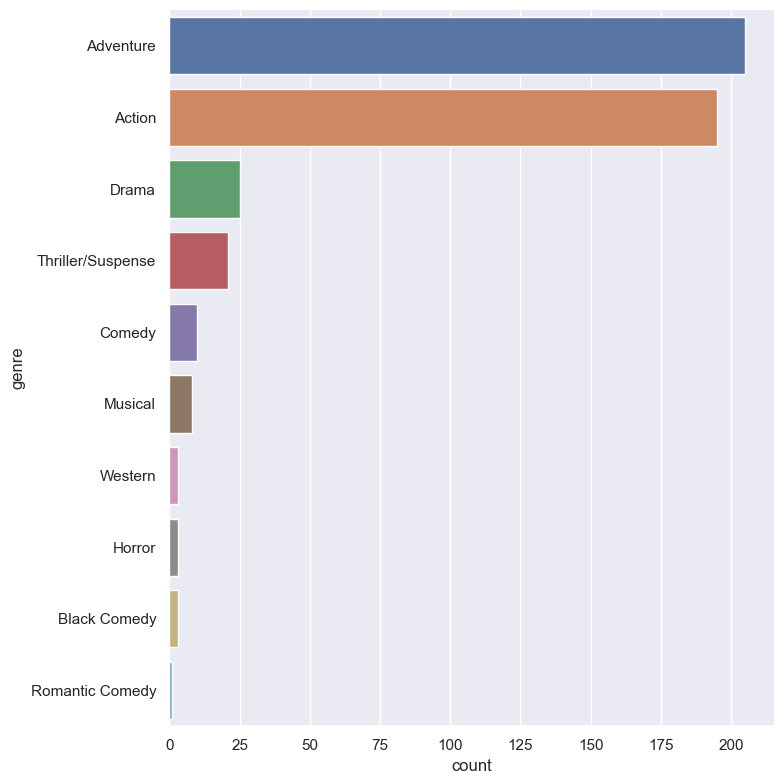

In [21]:
sb.catplot(y = 'genre', data = movieCatData, 
           kind = "count", 
           height = 8, 
           order = movieCatData['genre'].value_counts().index)

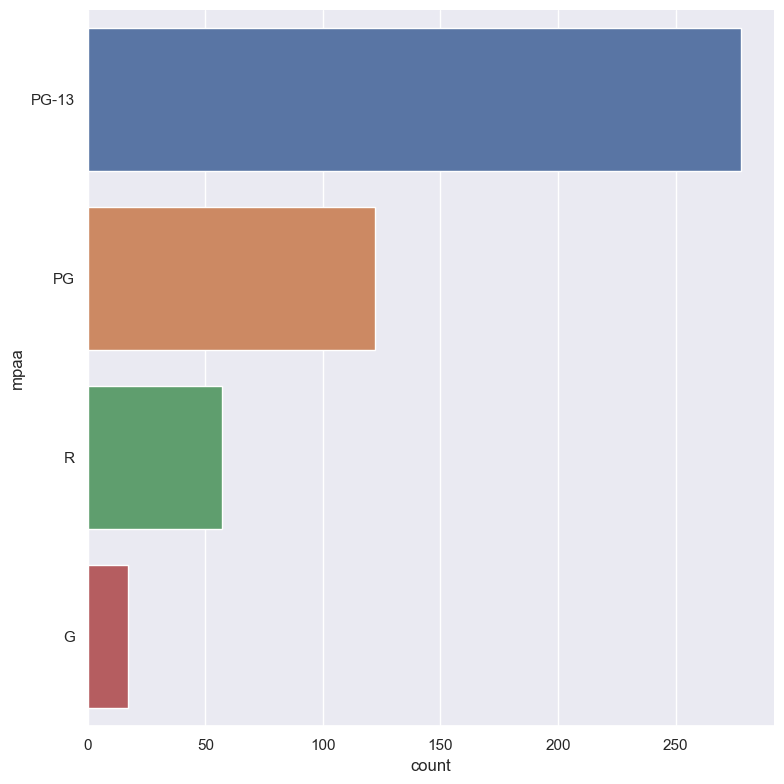

In [22]:
sb.catplot(y = 'mpaa', data = movieCatData, 
           kind = "count", 
           height = 8, 
           order = movieCatData['mpaa'].value_counts().index)

14

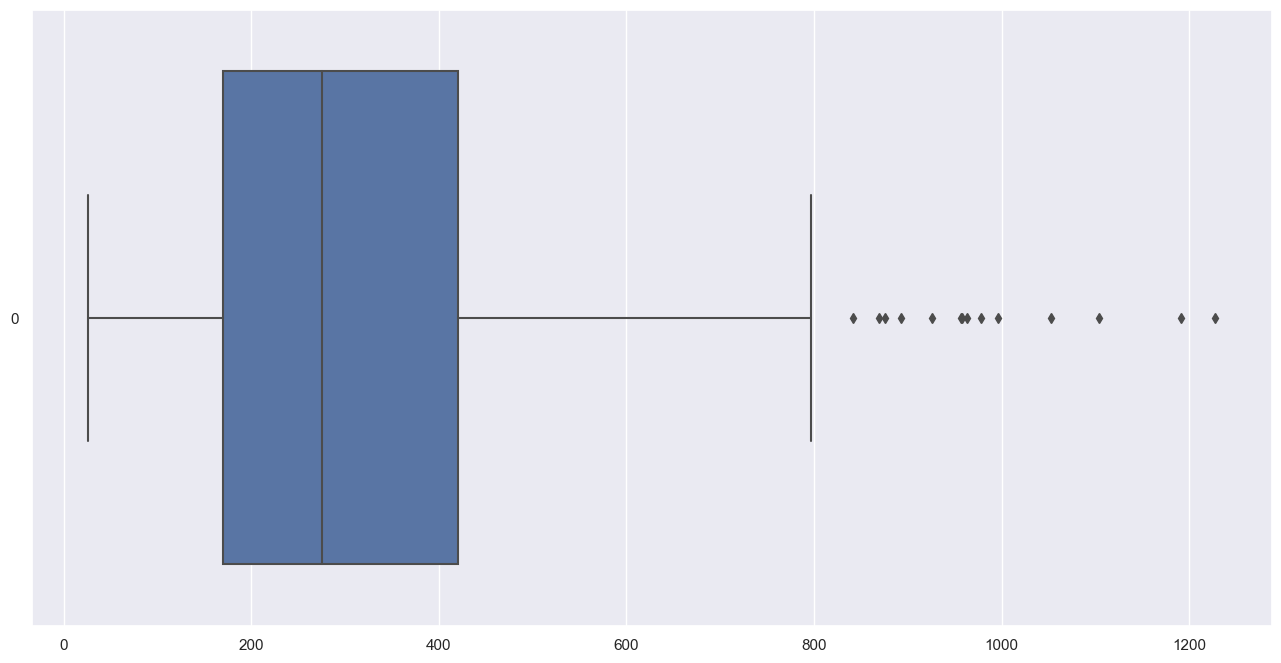

In [23]:
# Draw the boxplots
f, axes = plt.subplots(1,1, figsize=(16, 8))

sb.boxplot(data = movieCatData["percentage_worldwide"], orient = "h", ax = axes)


# Calculate the quartiles
Q1 = movieCatData["percentage_worldwide"].quantile(0.25)
Q3 = movieCatData["percentage_worldwide"].quantile(0.75)

# Rule to identify outliers
outliers = ((movieCatData["percentage_worldwide"] < (Q1 - 1.5 * (Q3 - Q1))) | 
        (movieCatData["percentage_worldwide"] > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
outliers.sum()

In [24]:
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
493    False
494    False
495    False
496    False
498    False
Name: percentage_worldwide, Length: 474, dtype: bool

In [25]:
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([24, 46, 48, 141, 189, 191, 303, 352, 414, 474, 485, 486, 487, 490], dtype='int64')

In [26]:
# Remove the outliers based on the row indices obtained above
movieCatData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
movieCatData

,percentage_worldwide,genre,mpaa
0,699.45,Action,PG-13
1,275.91,Adventure,PG-13
2,382.28,Action,PG-13
3,674.71,Adventure,PG-13
4,682.79,Action,PG-13
...,...,...,...
493,176.04,Adventure,PG
494,686.35,Adventure,PG
495,330.71,Action,R
496,25.99,Western,PG-13


In [27]:
movieCatData.describe()

,percentage_worldwide
count,460.000000
mean,296.790957
std,169.100219
min,25.990000
25%,168.160000
50%,268.390000
75%,399.287500
max,797.130000


### update categorical values

In [28]:
percentage_worldwide = pd.DataFrame(movieCatData['percentage_worldwide'])

### Time

In [29]:
movieTimeData = pd.DataFrame(movieData[['year', 'percentage_worldwide']])


In [30]:
# Remove the outliers based on the row indices obtained above
movieTimeData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
movieTimeData

,year,percentage_worldwide
0,2019.0,699.45
1,2011.0,275.91
2,2015.0,382.28
3,2015.0,674.71
4,2018.0,682.79
...,...,...
493,2008.0,176.04
494,2004.0,686.35
495,2013.0,330.71
496,2004.0,25.99


### Update time data


In [31]:
year = pd.DataFrame(movieTimeData['year'])

### Check Skewness of Dataset Components

In [32]:
movieNumData.skew()

production_cost    0.709112
worldwide_gross    0.864959
dtype: float64

# Joint Plot of Production Cost vs Worldwide Gross
### finding correlation

,production_cost,worldwide_gross
production_cost,1.000000,0.457078
worldwide_gross,0.457078,1.000000


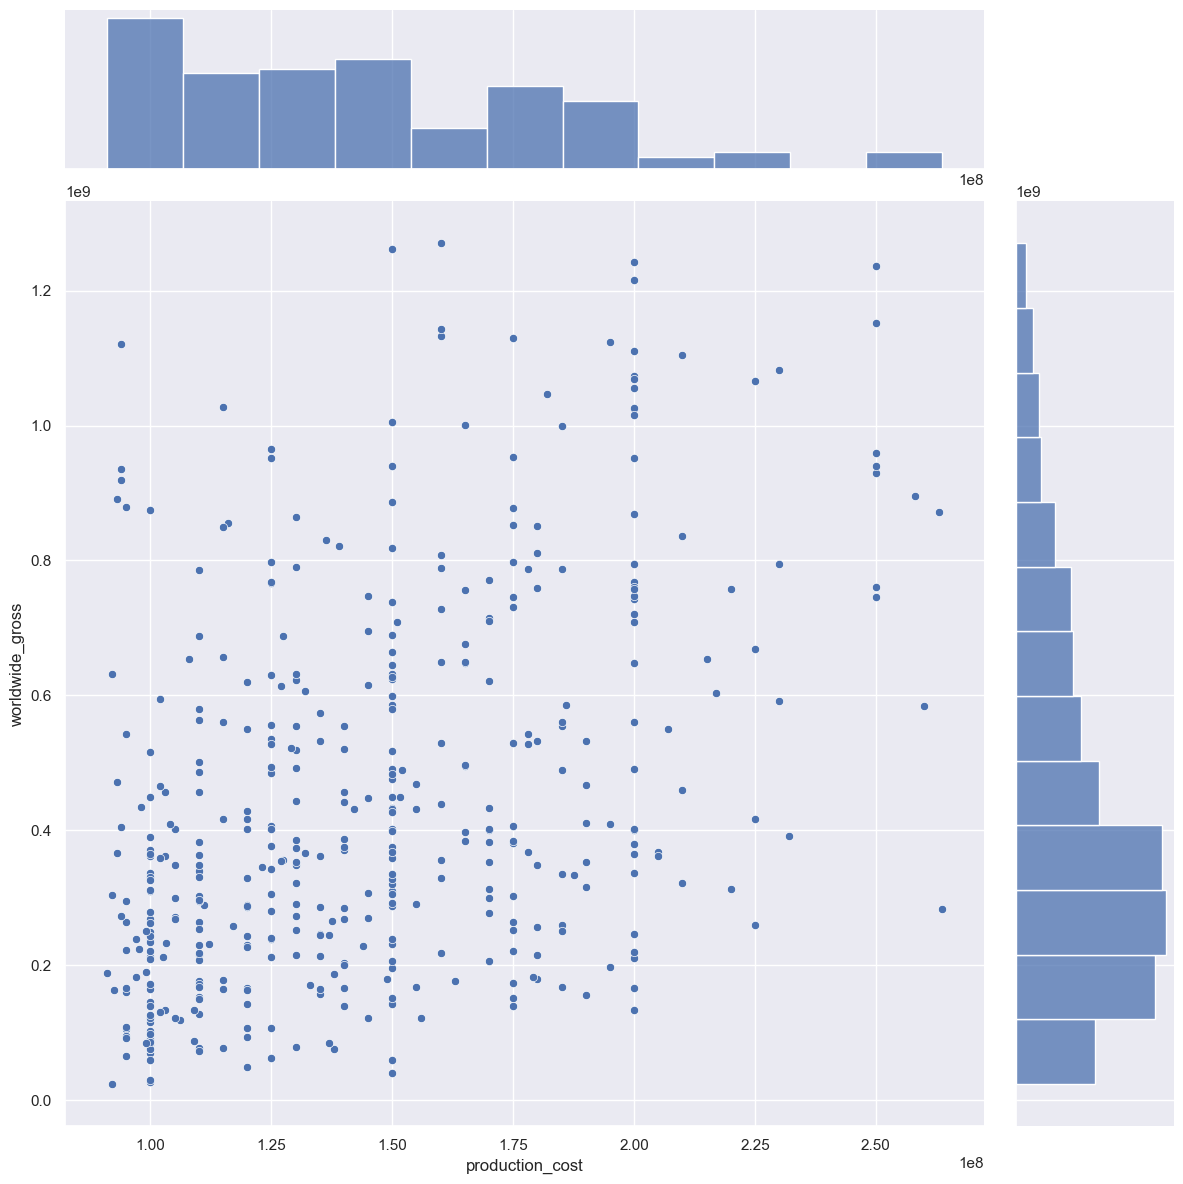

In [33]:
jointDFworldwide = pd.concat([production_cost, worldwide_gross], axis = 1).reindex(worldwide_gross.index)
jointDFworldwide
sb.jointplot(data = jointDFworldwide, x = "production_cost", y = "worldwide_gross", height = 12)
jointDFworldwide.corr()



# correlation b/w production cost & ww gross
### weak correlation is seen


<AxesSubplot:>

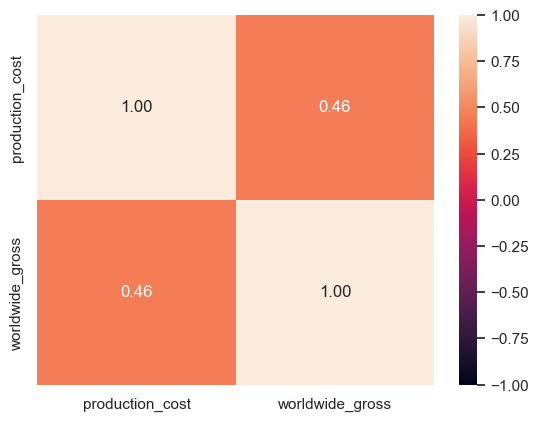

In [34]:
sb.heatmap(jointDFworldwide.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

,runtime,percentage_worldwide
runtime,1.000000,0.194406
percentage_worldwide,0.194406,1.000000


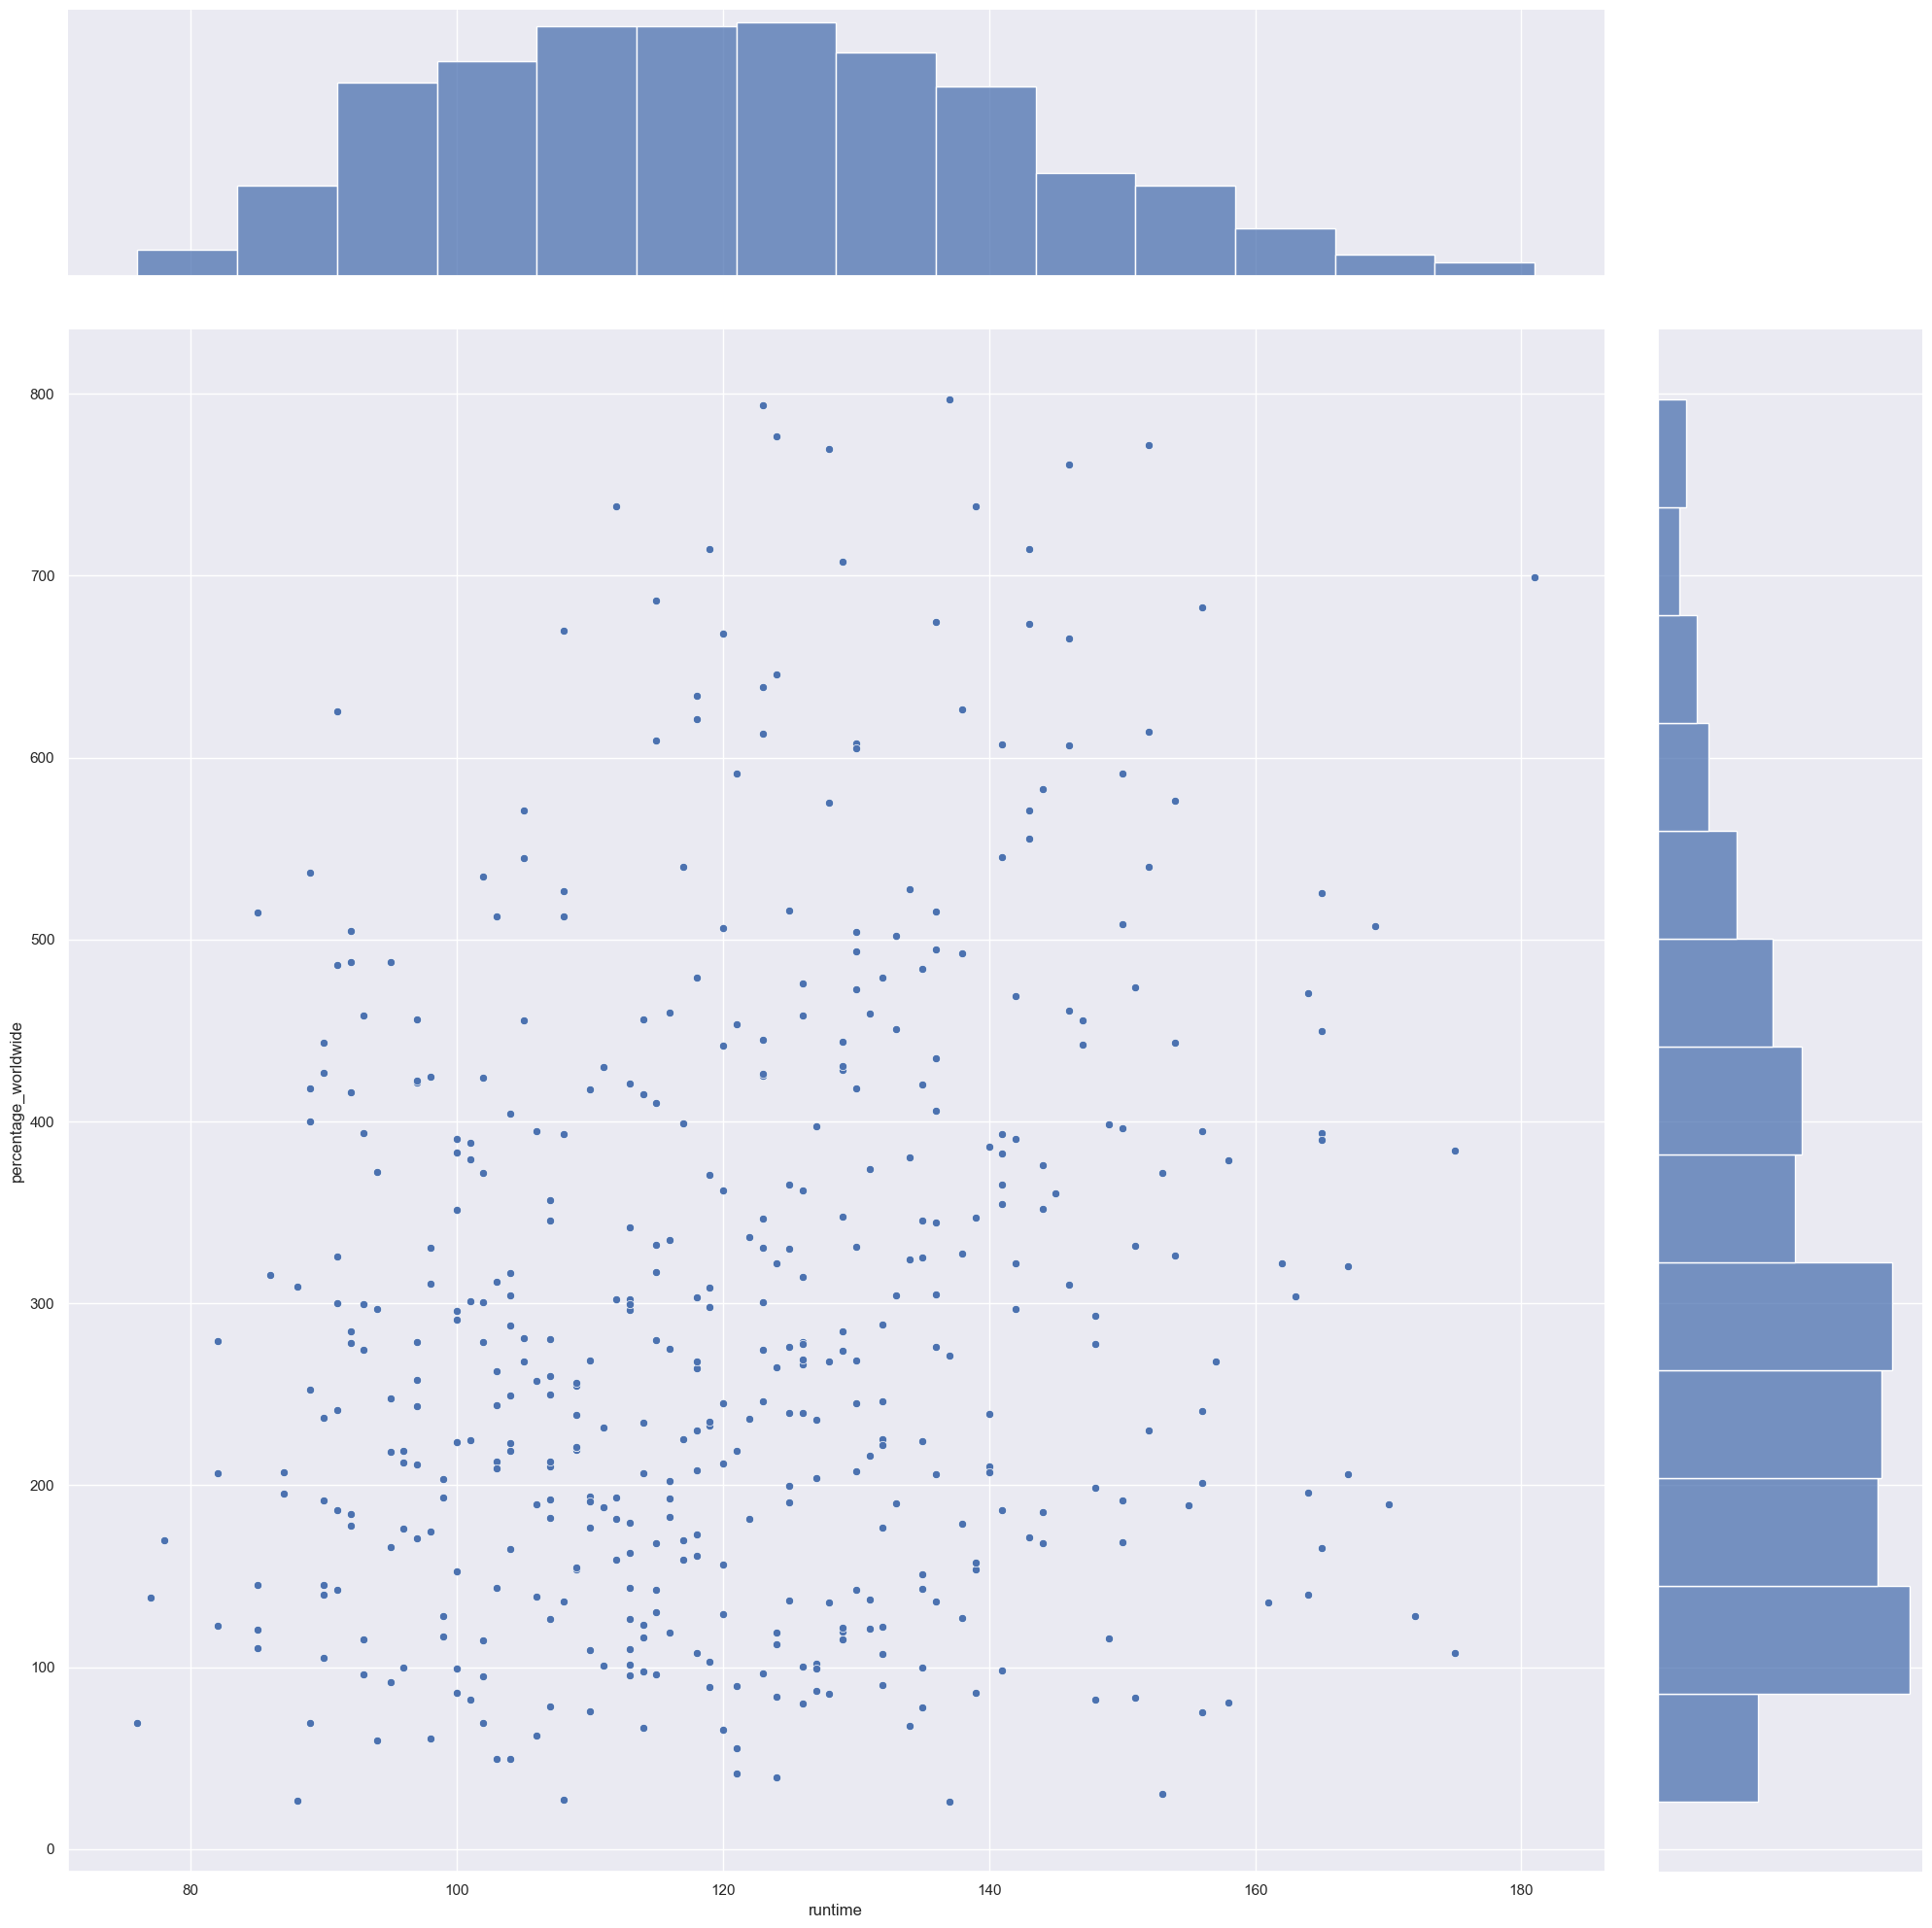

In [35]:
jointDFruntime = pd.concat([runtime,percentageForRun], axis = 1).reindex(runtime.index)
jointDFruntime
sb.jointplot(data = jointDFruntime, x = "runtime", y = "percentage_worldwide", height = 20)
jointDFruntime.corr()

<AxesSubplot:>

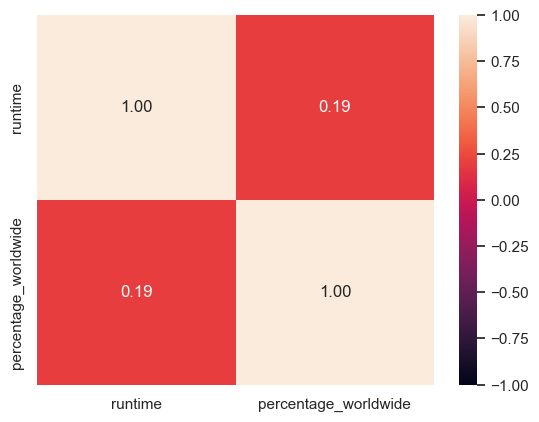

In [36]:
sb.heatmap(jointDFruntime.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Finding Other Relations vs Gross Earnings
### Genres + Movie Rating

### Percentage takes into account of Production Cost

<AxesSubplot:xlabel='genre', ylabel='percentage_worldwide'>

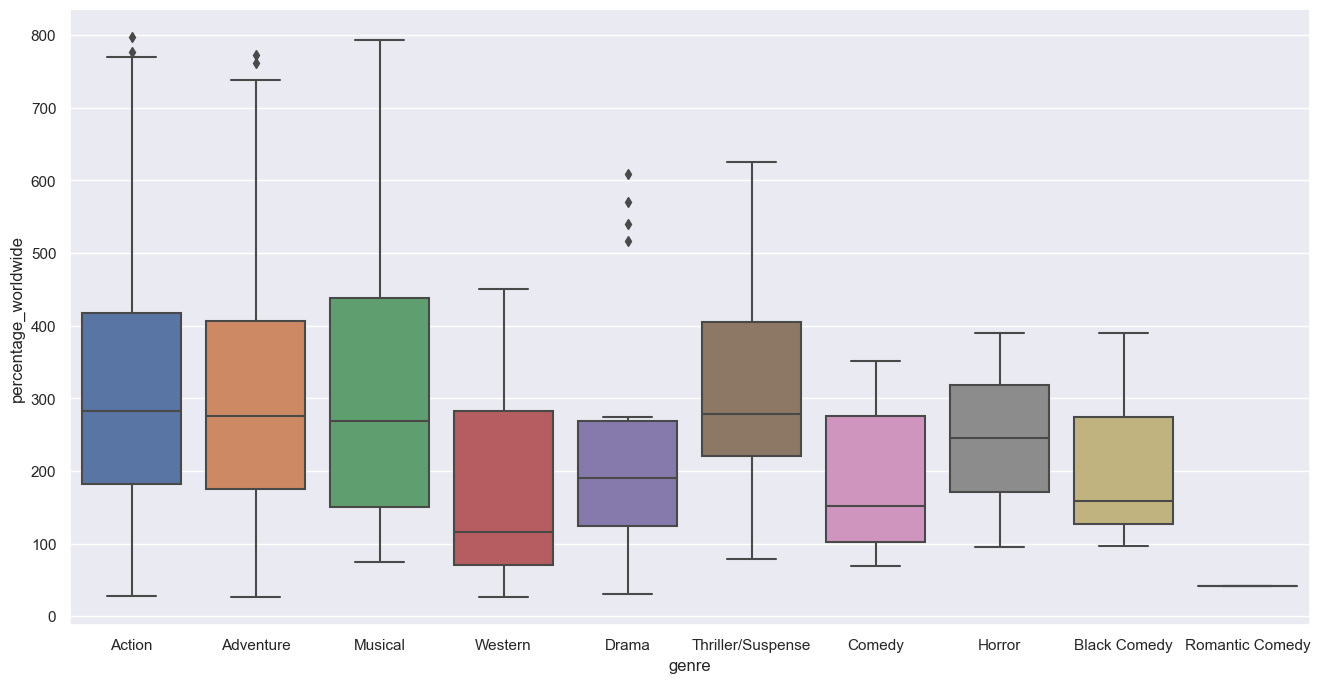

In [37]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'genre', y = 'percentage_worldwide', data = movieCatData)

<AxesSubplot:xlabel='mpaa', ylabel='percentage_worldwide'>

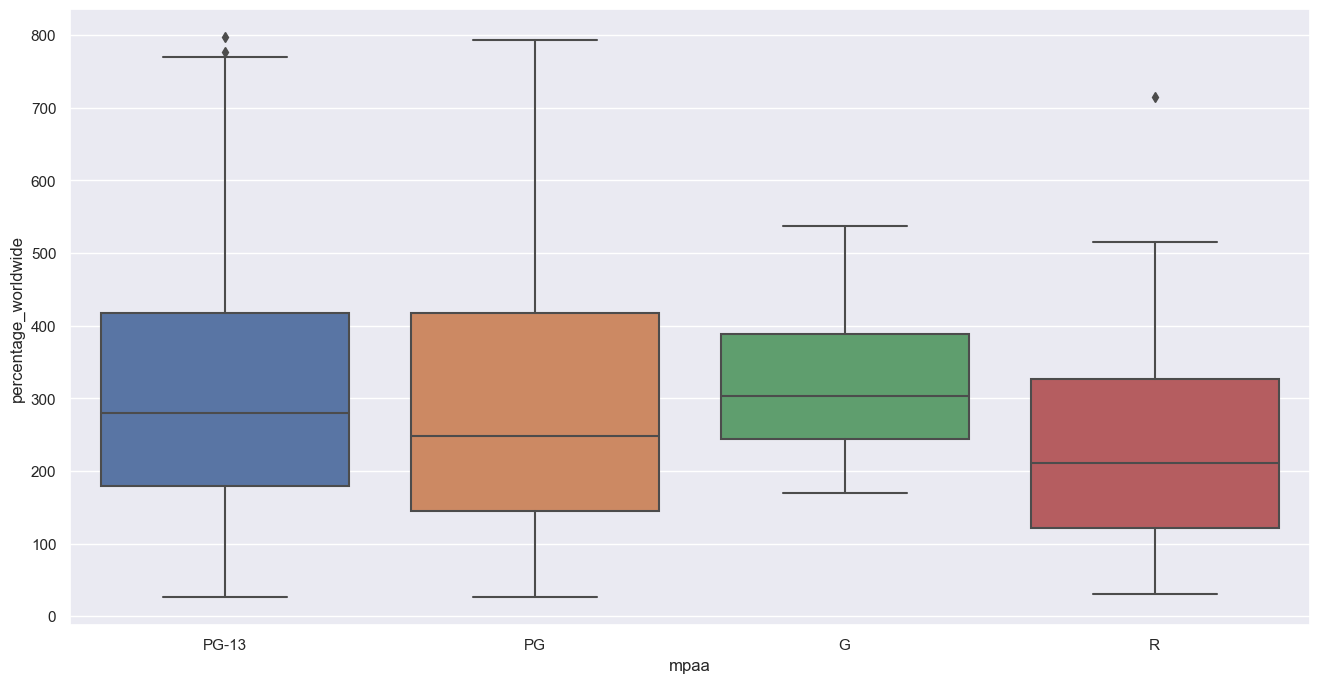

In [38]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mpaa', y = 'percentage_worldwide', data = movieCatData)

Intercept of Regression 	: b =  [-29608183.04018807]
Coefficients of Regression 	: a =  [[3.22478995]]

Intercept of Regression 	: b =  [61.92663539]
Coefficients of Regression 	: a =  [[1.95533865]]



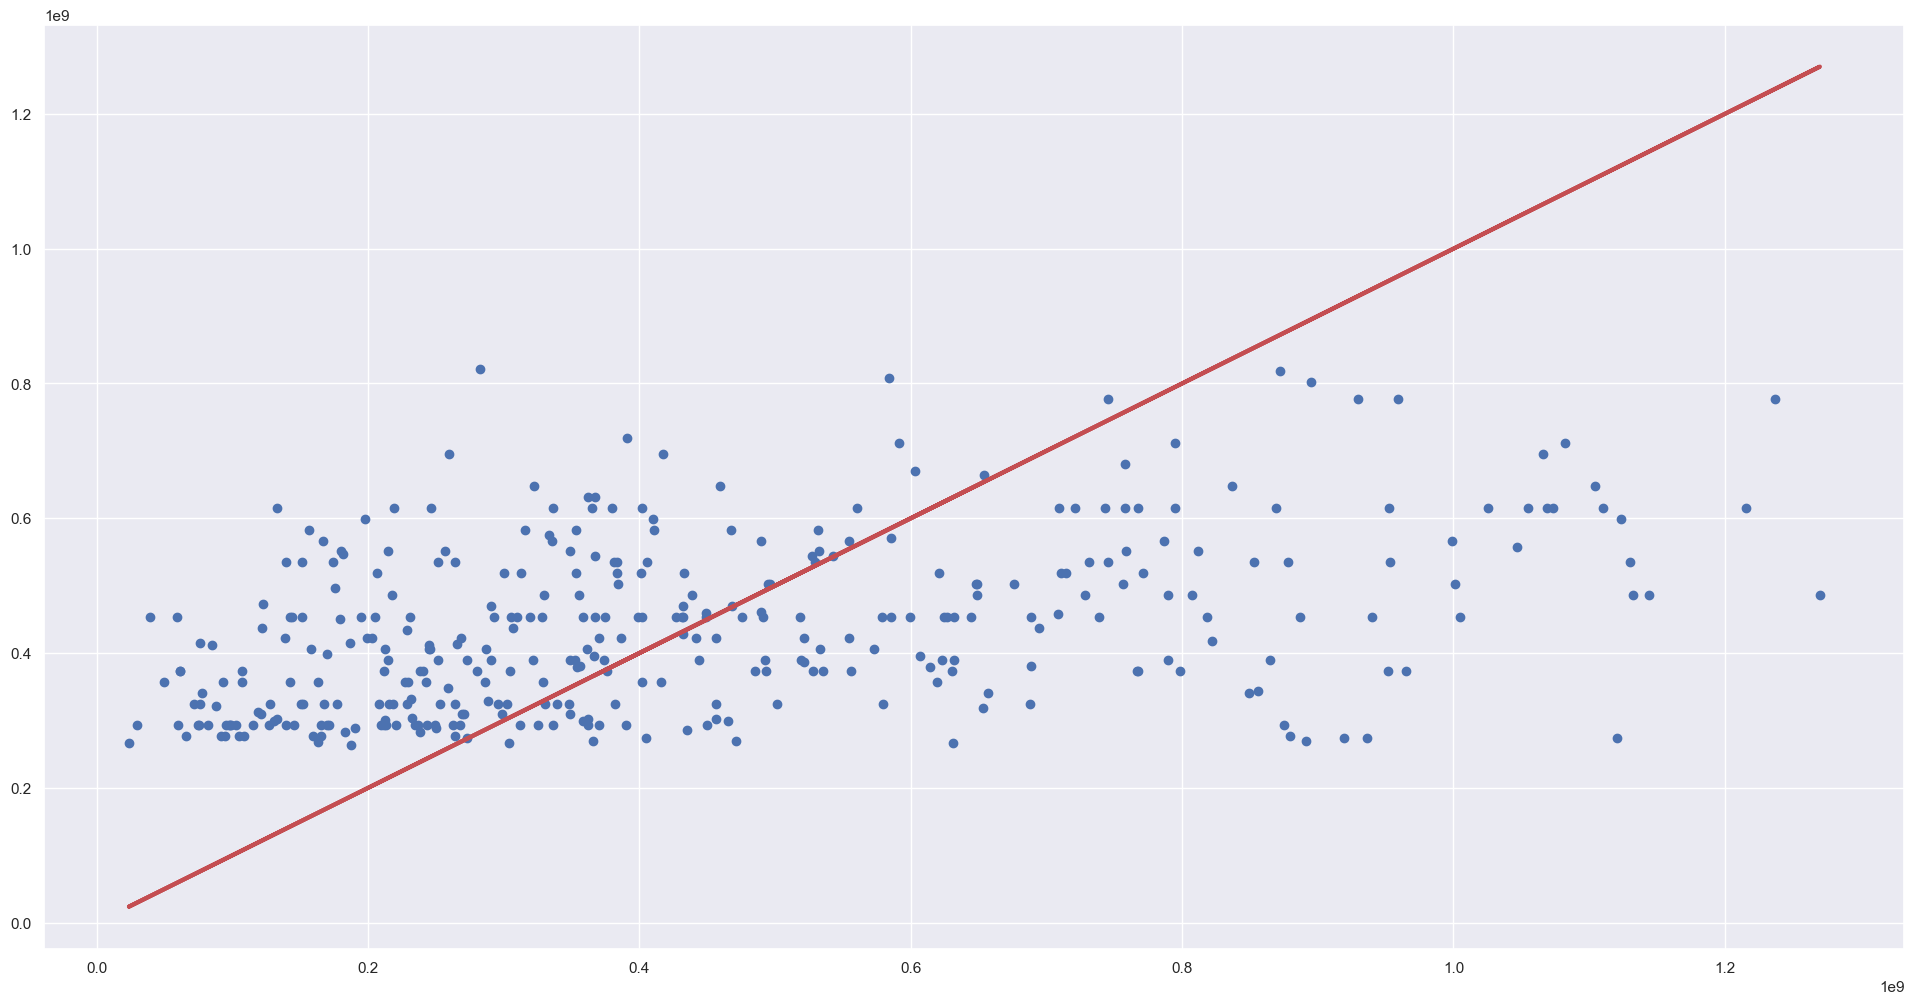

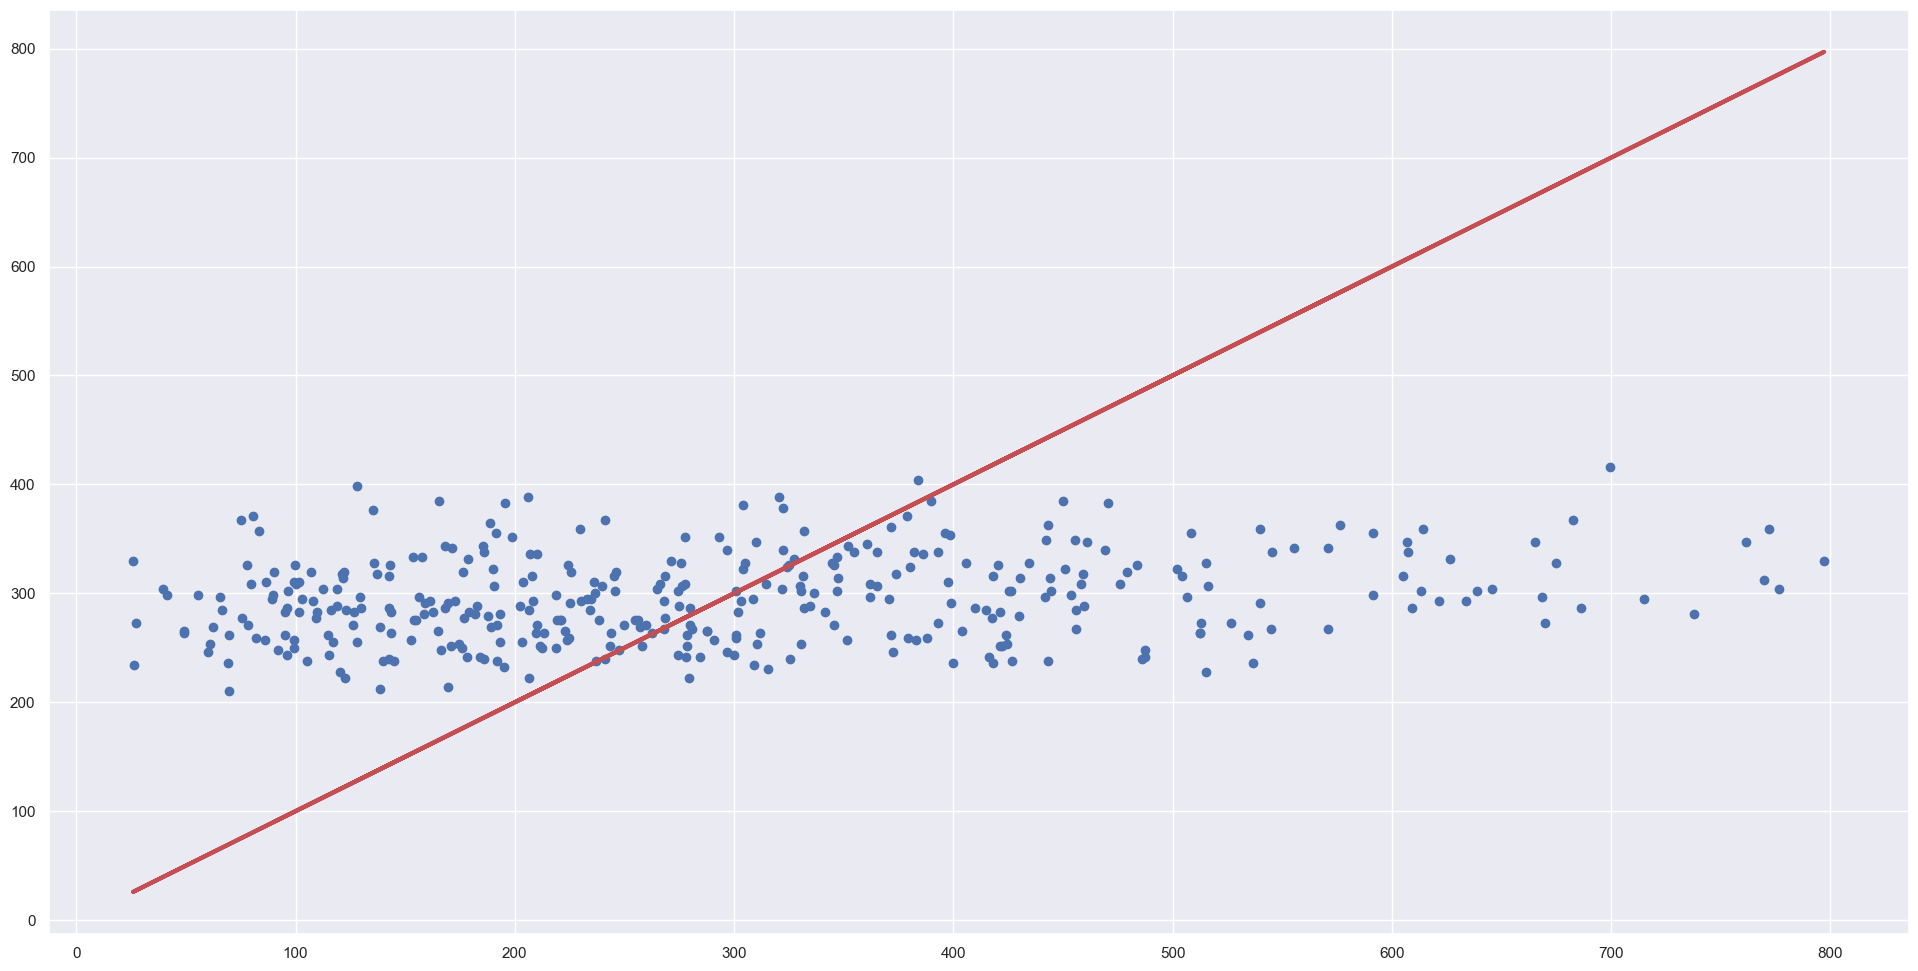

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def regression_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred, color = "b")
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

regression_func(production_cost,worldwide_gross)
regression_func(runtime,percentageForRun)

In [40]:
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#compare the  three model----------------------------------------------------------------
print("production_cost vs. worldwide_gross")
gof_func(production_cost,worldwide_gross)
print("\nruntime vs. percenage_gross")
gof_func(runtime,percentageForRun)

production_cost vs. worldwide_gross
Mean Squared Error (MSE) 	: 5.7632874712491176e+16
Root Mean Squared Error (RMSE) 	: 240068479.21476734

runtime vs. percenage_gross
Mean Squared Error (MSE) 	: 24601.682822591265
Root Mean Squared Error (RMSE) 	: 156.84923596432105


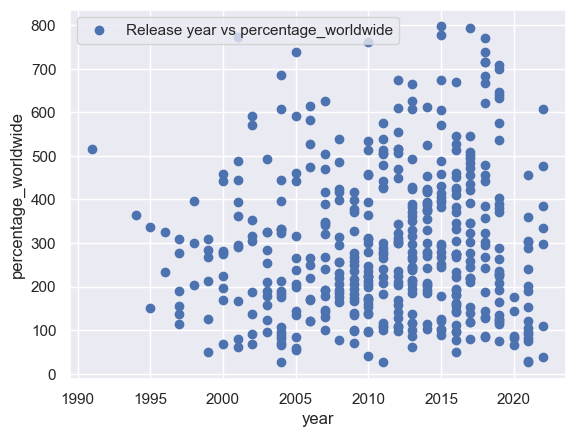

In [41]:
plt.scatter(year, percentage_worldwide, label = "Release year vs percentage_worldwide")
plt.xlabel('year')
plt.ylabel('percentage_worldwide')

plt.legend()
plt.show()


### From the above graph, it shows that after the year 2000, there has been more movies being produced, and at the same time there is a general increase in the world wide gross.

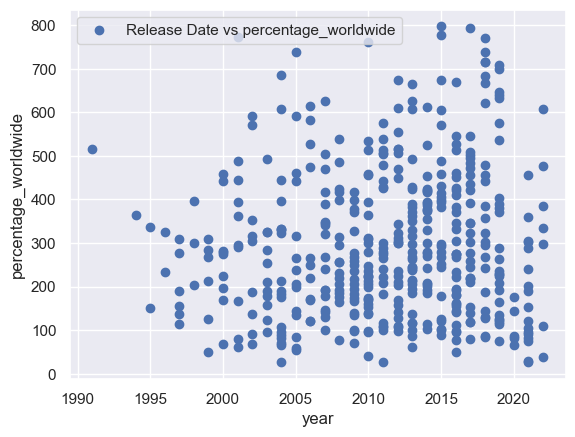

In [42]:
plt.scatter(year, percentage_worldwide, label = "Release Date vs percentage_worldwide")
plt.xlabel('year')
plt.ylabel('percentage_worldwide')

plt.legend()
plt.show()

### random tree

In [43]:
tree_data =  pd.DataFrame(movieData[['worldwide_gross','domestic_gross','production_cost','opening_weekend','theaters',
                                    'runtime']])

In [44]:
tree_data

,worldwide_gross,domestic_gross,production_cost,opening_weekend,theaters,runtime
0,2797800564,858373000,400000000,357115007.0,4662.0,181.0
1,1045713802,241071802,379000000,90151958.0,4164.0,136.0
2,1395316979,459005868,365000000,191271109.0,4276.0,141.0
3,2064615817,936662225,306000000,247966675.0,4134.0,136.0
4,2048359754,678815482,300000000,257698183.0,4474.0,156.0
...,...,...,...,...,...,...
493,162839667,71195053,92500000,19004058.0,3847.0,96.0
494,631441092,261441092,92000000,70467623.0,3933.0,115.0
495,304249198,67349198,92000000,24834845.0,3555.0,98.0
496,23911362,22406362,92000000,9124701.0,2609.0,137.0


In [45]:
# random forest classifier
X = tree_data.iloc[:,2:]
y = tree_data.iloc[:,0]
#hotel_data.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred,average="weighted")

print(accuracy_rf, f1_rf)



0.0 0.0


In [47]:
# random forest classifier
X = tree_data.iloc[:,2:]
y = tree_data.iloc[:,0]
#hotel_data.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred,average='weighted')

print(accuracy_knn, f1_knn)

0.0 0.0


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
